In [8]:
#Importing NLP packages
from textblob import TextBlob, Word
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import _stop_words

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

from yellowbrick.text import FreqDistVisualizer

import string
import re
import pandas as pd # to dataframes
import numpy as np #to math
import umap
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [9]:
strains = pd.read_csv('combined text data', index_col= 0)
strains.head()

,name,strain_type,effect,may_relieve,aromas,flavors,rating,description,fav_count,sativa_comp,indica_comp,cbd,cbn,avg_thc,combined_text
0,s a g e sativa afghani genetic equilibrium ...,hybrid,energizing euphoria happy relaxi...,add adhd anxiety chronic pain de...,earthy herbal sage spicy woo...,sage spicy,4.8,s a g e is a popular marijuana strain that won...,621.0,0.5,0.5,0.00,0.00,0.19,s a g e sativa afghani genetic equilibrium ...
1,cannatonic marijuana strain,hybrid,calming happy mellow relaxing ...,anxiety chronic pain cramps head...,citrus earthy herbal lemon s...,citrus herbal sour spicy swe...,4.7,cannatonic is an evenly balanced hybrid strain...,1535.0,0.5,0.5,0.14,0.01,0.07,cannatonic marijuana strain calming happ...
2,blue dream marijuana strain,sativa dominant hybrid,creative energizing euphoria hap...,add adhd anxiety autism bipolar ...,earthy fruity sweet vanilla,berry blueberry fruity herbal ...,4.5,blue dream is a slightly sativa dominant hybri...,15731.0,0.6,0.4,0.02,0.01,0.17,blue dream marijuana strain creative ene...
3,goji og marijuana strain,sativa dominant hybrid,creative energizing euphoria hap...,chronic pain depression gastrointest...,cherry pungent sweet,berry cherry strawberry sweet ...,4.5,named after the bright red himalayan berry th...,301.0,0.8,0.2,0.01,0.00,0.22,goji og marijuana strain creative energi...
4,green love potion marijuana strain,indica dominant hybrid,aroused happy relaxing sleepy,anxiety chronic pain cramps depr...,earthy floral lavender pungent ...,chemical herbal lavender menthol...,4.5,being an indica dominant hybrid strain green ...,60.0,0.8,0.2,0.00,0.00,0.11,green love potion marijuana strain aroused ...


In [10]:
#preprocessing the text in the combined text tab 

stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor','dominant','known','cross']
stopwords.update(newStopWords)

df_combined_text = strains['combined_text'].astype(str)
df_stop_words_out_des=df_combined_text.apply(lambda x: " ".join(x for x in x.split() if x not in stopwords)) #remove stopwords
df_lemma_des=df_stop_words_out_des.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))  #lemmatize
print(df_lemma_des.head())



0    s g e sativa afghani equilibrium marijuana ene...
1    cannatonic marijuana calming happy mellow rela...
2    blue dream marijuana creative energizing eupho...
3    goji og marijuana creative energizing euphoria...
4    green love potion marijuana aroused happy rela...
Name: combined_text, dtype: object


In [12]:
df_digits = df_lemma_des.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
print(df_digits.head())
print(df_digits.describe())

0    4
1    6
2    4
3    5
4    3
Name: combined_text, dtype: int64
count    8924.000000
mean        4.046616
std         1.788197
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        18.000000
Name: combined_text, dtype: float64


In [14]:
#Identify and plot common words 
common_words = pd.Series(' '.join(df_stop_words_out_des).split()).value_counts()[:10]
print(common_words)

high          26745
chronic       20899
sweet         19833
spicy         13981
depression    13929
stress        13281
indica        13210
pain          13166
sour          12648
bud           12146
dtype: int64


In [15]:
#Identify and plot least common words 
rare_words = pd.Series(' '.join(df_stop_words_out_des).split()).value_counts()[-10:]
print(rare_words)

remedies         1
perfection       1
phases           1
abducted         1
knights          1
jitters          1
miserable        1
participation    1
ogp              1
preached         1
dtype: int64


In [16]:
df_lemma_des.to_csv('clean combined  text')

In [21]:
df_lemma_des.head()

0    s g e sativa afghani equilibrium marijuana ene...
1    cannatonic marijuana calming happy mellow rela...
2    blue dream marijuana creative energizing eupho...
3    goji og marijuana creative energizing euphoria...
4    green love potion marijuana aroused happy rela...
Name: combined_text, dtype: object

In [19]:
#Visualization of most frequent words 
all_words = df_lemma_des.str.split(expand = True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[1:50],
            y = all_words.values[1:50],
            marker = dict(colorscale = 'Jet',
                          color = all_words.values[2:100])
)]

layout = go.Layout(
    title = 'Top 50 Word Frequencies',
)
fig = go.Figure(data = data, layout = layout)
plot(fig)

'temp-plot.html'

Advanced Text Pre-Processing

In [25]:
#N-grams for the combined text that includes raw cleaned text from description, effect, flavor, may_relieve


bigram = TextBlob(df_lemma_des[0]).ngrams(2)
trigram = TextBlob(df_lemma_des[0]).ngrams(3)
print(bigram)
print(trigram)  


[WordList(['s', 'g']), WordList(['g', 'e']), WordList(['e', 'sativa']), WordList(['sativa', 'afghani']), WordList(['afghani', 'equilibrium']), WordList(['equilibrium', 'marijuana']), WordList(['marijuana', 'energizing']), WordList(['energizing', 'euphoria']), WordList(['euphoria', 'happy']), WordList(['happy', 'relaxing']), WordList(['relaxing', 'sage']), WordList(['sage', 'spicy']), WordList(['spicy', 'add']), WordList(['add', 'adhd']), WordList(['adhd', 'anxiety']), WordList(['anxiety', 'chronic']), WordList(['chronic', 'pain']), WordList(['pain', 'depression']), WordList(['depression', 'hyperactivity']), WordList(['hyperactivity', 'insomnia']), WordList(['insomnia', 'migraine']), WordList(['migraine', 'mood']), WordList(['mood', 'swing']), WordList(['swing', 'nausea']), WordList(['nausea', 'stress']), WordList(['stress', 'earthy']), WordList(['earthy', 'herbal']), WordList(['herbal', 'sage']), WordList(['sage', 'spicy']), WordList(['spicy', 'woody']), WordList(['woody', 's']), WordL

In [26]:
#Term frequency of Description
tf1 = df_lemma_des.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
print(tf1.head())

    words       tf
0       s   7020.0
1       e     36.0
2       g    311.0
3  indica  13210.0
4    sage    529.0


In [27]:
#Inverse Document Frequency of Description
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df_lemma_des.shape[0]/(len(df_lemma_des[df_lemma_des.str.contains(word)])))
print(tf1.head())

    words       tf       idf
0       s   7020.0  0.000000
1       e     36.0  0.000000
2       g    311.0  0.000000
3  indica  13210.0  0.099476
4    sage    529.0  2.993941


In [28]:
#TF-IDF

tf1['tfidf'] = tf1['tf'] * tf1['idf']
print(tf1.head())


    words       tf       idf        tfidf
0       s   7020.0  0.000000     0.000000
1       e     36.0  0.000000     0.000000
2       g    311.0  0.000000     0.000000
3  indica  13210.0  0.099476  1314.080260
4    sage    529.0  2.993941  1583.794768


In [29]:
tfidf = TfidfVectorizer(max_features  = 5000,
                        lowercase= True,
                        analyzer= 'word',
                        stop_words='english',
                        ngram_range= (1,3))

train_vect = tfidf.fit_transform(df_lemma_des)
train_vect



<8924x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1965325 stored elements in Compressed Sparse Row format>

In [30]:
#Bag of words 
bow = CountVectorizer(max_features= 5000,
                      lowercase= True, 
                      ngram_range=(1,3),
                      analyzer= 'word')
train_bow = bow.fit_transform(df_lemma_des)
train_bow

<8924x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 2053186 stored elements in Compressed Sparse Row format>

In [31]:
#LSA Analysis 
tfidf2 = TfidfVectorizer(strip_accents='ascii',
                         lowercase= True, 
                         max_df= 0.90,
                         max_features= 5000,
                         min_df=0.1,
                         analyzer='word', 
                         stop_words= 'english', 
                         ngram_range=[1,3])

train_vect2 = tfidf.fit_transform(df_lemma_des)
train_vect2.shape

(8924, 5000)

In [32]:
svd_model = TruncatedSVD(n_components= 3, 
                         algorithm= 'randomized',
                         n_iter= 300,
                         random_state= 122)
svd_model.fit(train_vect2)
len(svd_model.components_)

3

In [35]:
#LSA Part 2 

terms = tfidf.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key = lambda x:x[1], reverse = True)[:5]
    print("Topic " + str(i)+ ": ")
    for t in sorted_terms:
        print(t[0])
    print('\n')

Topic 0: 
high
sour
sweet
chronic
spicy


Topic 1: 
og
kush
user
pine
taste


Topic 2: 
lemon
sour
haze
citrus
fatigue




OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


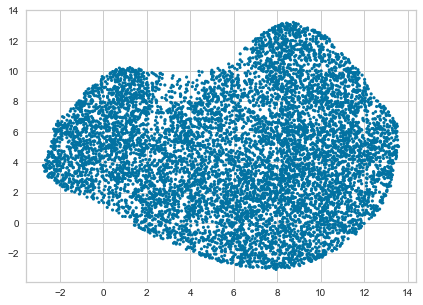

In [41]:
import umap.umap_ as umap

X_topics = svd_model.fit_transform(train_vect)
embedding = umap.UMAP(n_neighbors = 150, min_dist = 0.5,
                      metric ='euclidean', random_state = 12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], 
            embedding[:, 1],
            cmap='Spectral',
            s = 10, # size
            edgecolor='none'
           )
plt.show()
